In [1]:
import pandas as pd

df=pd.read_csv('/home/anu/Downloads/Datasets/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
df['company'].unique()

array(['google', 'abc pharma', 'facebook'], dtype=object)

In [3]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [4]:
df.shape

(16, 4)

In [5]:
x=df.drop('salary_more_then_100k',axis=1)
y=df['salary_more_then_100k']

In [6]:
#encode the text values
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()


In [7]:
x['company_n']=enc.fit_transform(x['company'])
x['job_n']=enc.fit_transform(x['job'])
x['degree_n']=enc.fit_transform(x['degree'])


In [8]:
x_n=x.drop(['company','job','degree'],axis=1)
x_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [9]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

model.fit(x_n,y)

DecisionTreeClassifier()

In [10]:
model.score(x_n,y)

1.0

# Qn:Is salary of Google , computer engineer,bachelor degree >100k ?


In [11]:
model.predict([[2,1,0]])

array([0])

In [12]:
#array[0] means a computer engr with bachelor degree doesnt have salary > 100k

In [13]:
importances=model.feature_importances_
#means just shows the importance of features here

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


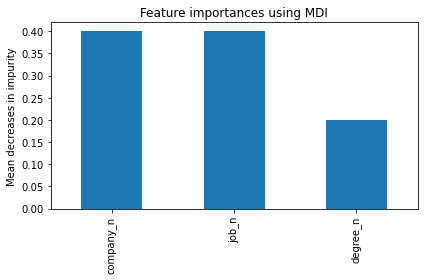

In [15]:
#visualizing the importance
forest_importances = pd.Series(importances, index=x_n.columns)

fig, ax= plt.subplots()

forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decreases in impurity")
fig.tight_layout()

In [17]:
#pip install graphviz

#tree_img =tree.export_graphviz(model,out_file='tree.dot',feature_names=x_n.columns,
                  #            filled=True)

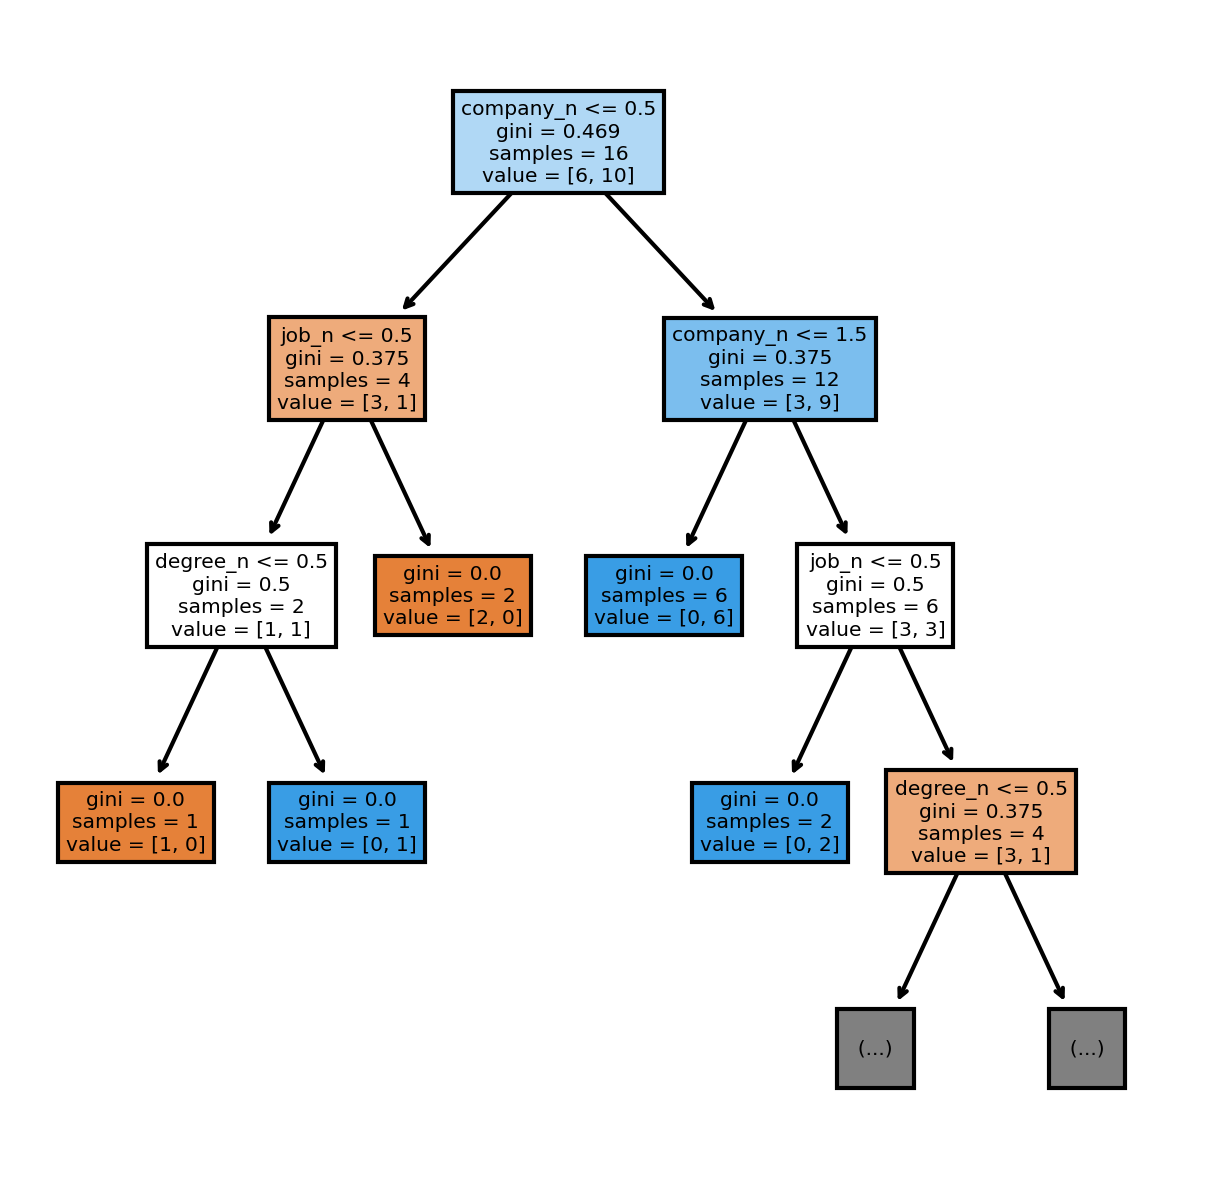

In [24]:
#!dot -Tpng tree.dot -o tree.png

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
a=tree.plot_tree(model,feature_names=x_n.columns,
max_depth=3,filled=True)#also try max_depth=3 or None
fig.savefig('tree.png') 

In [20]:
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600']) #Not working for us